### 简单的遗传算法教程

*本教程参考知乎网友 [牛阿](https://www.zhihu.com/question/23293449/answer/120530793)的回答以及[Medium上的教程](https://towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)，并使用python进行了实现*

### 1 遗传算法基本原理

遗传算法是从达尔文的自然进化理论而得到的一种启发式算法。在自然选择的过程中，父母的特征将被子女继承，如果父母有更好的适应环境的能力，那么他们的子女也会更好适应环境并且生存下来。经过一轮轮的迭代，最后最能适应的个体将会被找到。

遗传算法可以用在搜索问题中，在一系列的答案中，遗传算法可以帮助我们找到他们中的最优解。正常的遗传算法包括五步：
- 种群初始化
- 适应度函数
- 选择
- 交叉
- 变异

### 2 种群初始化


该过程是从一组称为种群的个体开始的，每一个个体都是问题的一个解。然后每个个体是由一系列的参数组成，这些参数被称作基因，基因最后组成了染色体。
基因通常使用0或者1字符组成，一组0或1字符串组成了一个染色体，每个染色体是问题的一个解，也代表了一个个体。若干个个体最后组成了种群。

开始阶段，寻找一系列的可行解，并将其编码成染色体的方式，这就是种群的初始化。

### 3 适应度函数

适应度函数用来决定每一个个体对环境的适应程度，对于每个个体，适应度函数计算出对应的适应度分数。在选择环节，每个个体的被选中的概率是与适应度函数得分相关的。

### 4 选择

选择环节是选择出适应度最高的个体，并将其基因传给下一代。两个配对的个体被基于他们的适应度分数进行选择，适应度高的个体将会有更大的可能性被选中进行再次生育。

### 5 交叉

交叉是遗传算法中最重要的环节之一，对于每一对被选中的父母，交叉点是从基因内随机选择的。父母染色体在随机的交叉点处进行交换，产生子代，子代随后也被加入到种群中。

### 6 变异

子代经过上述过程已经完全成型，但是子代的某些基因还会以很小的随机概率发生变异，变现在代码中就是比特串的某些位置会发生翻转。变异的目的是为了保持种群内的多样性并防止早熟收敛。

### 7 终止条件

算法的收敛条件是种群已经收敛，及不会产生与前一代有着显著不同的后代。

### 8 伪代码

START

Generate the initial population

Compute fitness

REPEAT

    Selection

    Crossover
    
    Mutation
    
    Compute fitness

UNTIL population has converged

STOP

### 9 代码实现

代码GA.py中实现用遗传算法求解$f(x) = x + 10sin(5x)+7cos(4x)$的遗传算法，其中交叉选用单区间交换，变异选择单点变异。

### 10 参数观察

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


最大的值： 24.85535852268893
最大值取值处的x: 7.856589176858344


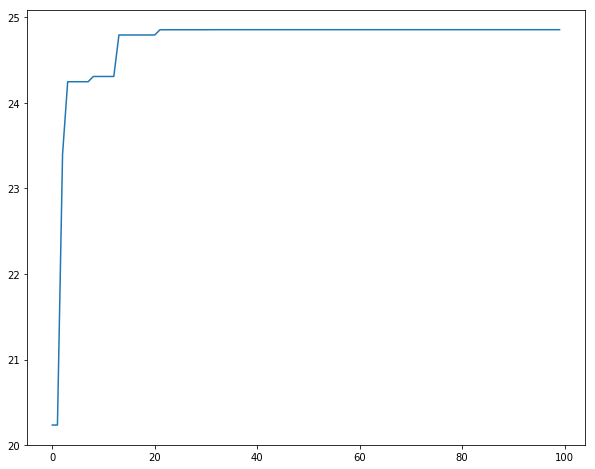

In [16]:
from algs.GA import GA
# 三个参数分别为种群的大小，交叉率和变异率
ga = GA(n = 30, cross_rate = 0.85, mutation_rate = 0.2)
num = []
value = []
i = 0
#观察遗传100代之后的最大值的变化情况
while i < 100:
    ga.generate_new()
    num.append(i)
    value.append(ga.max_fitness)
    i = i + 1
print("最大的值：", ga.max_fitness)
print("最大值取值处的x:", ga.max_x)
plt.plot(num,value)